![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M11.T01
# PROJECTE FINAL
#### Creat per: Dani Planas Montserrat
#### Data Inici: 30.10.2022

In [298]:
#************************************************************************************
#***************************        IMPORT LIBRARIES       **************************
#************************************************************************************
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector

#Import Libraries Financial Data
from pandas_datareader import data         # Used to extract from internet financial data
import mplfinance as fplt                  # Provides utilities for the visualization, and visual analysis of financial data
import cufflinks as cf                     # Provide connection between Panda's Library and Ploty


#Import Library Preprocessing and modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Import Libraries datatime
from datetime import datetime, timedelta

# Import Library Geolocation
from ip2geotools.databases.noncommercial import DbIpCity

# Import Library warnings
import warnings
warnings.filterwarnings('ignore')


In [299]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep=',', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [300]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [301]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing an  Over Sampling (using SMOTE)
def overSampling(data, target):
   
    #Import libraries
    from imblearn.over_sampling import SMOTE

    #SMOTE
    smote = SMOTE()
    
    #Generate the new sintetic samples
    dataSmote, targetSmote = smote.fit_resample(data,target)
    
    return dataSmote, targetSmote                           # Return result

#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [302]:
#************************************************************************************
#********************       LINEAR REGRESSION Functions          ********************
#************************************************************************************
# Function that Split data in train and test:
def split_TrainTest(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 

# Function that Split data in train and test:

def split_TrainTest_V2(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train and Test
    X = df[Xparam]
    y = df[Yparam]


    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y.values.reshape(-1,1),
                                            train_size   = 0.8,
                                            random_state = 1234,
                                            shuffle      = True#,
                                            #test_size=0.33
                                            )

    # Create the Model with Train & Test
    X_train = sm.add_constant(X_train, prepend=True)
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 

# Function that Split data in train and test:
def split_TrainTest_KNN(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn.neighbors import KNeighborsClassifier
    
    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    #print(model.summary())
    return classifier, X_train, X_test, y_train, y_test 

In [303]:
#************************************************************************************
#**************************     Models MACHINE LEARNING     *************************
#************************************************************************************

# Function: create a MODEL of REGRESION +(and Split data in train and test) + Prediction
# using libraries sklearn
def model_MLR_Regresion(data, target):

    #Import libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt

    #1. Initialization
    modelLR = LogisticRegression()

    #2. Split data in TRAIN and TEST
    dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, 
                                                                    test_size=0.3,
                                                                    random_state = 0)
    #3. Train Model
    modelLR.fit(dataTrain, targetTrain)

    #4. Prediction with Model
    targetPred = modelLR.predict(dataTest)

    #5.Show Result: a Plot with Confusion Matrix
    array = confusion_matrix(targetPred, targetTest)
    df_cm = pd.DataFrame(array)

    sn.set(font_scale=1)
    plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

    return modelLR, dataTrain, dataTest, targetTrain, targetTest, targetPred

# Function: create a MODEL of DECISION TREE + (and Split data in train and test) + Prediction
# using libraries sklearn
def model_MLR_DecisionTree(data, target):

    #Import libraries
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt

    #1. Initialization
    modelDT = DecisionTreeClassifier()

    #2. Split data in TRAIN and TEST
    dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, 
                                                                    test_size=0.3,
                                                                    random_state = 0)
    #3. Train Model
    modelDT.fit(dataTrain, targetTrain)

    #4. Prediction with Model
    targetPred = modelDT.predict(dataTest)

    #5.Show Result: a Plot with Confusion Matrix
    array = confusion_matrix(targetPred, targetTest)
    df_cm = pd.DataFrame(array)

    sn.set(font_scale=1)
    plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap = 'Reds')) 

    return modelDT, dataTrain, dataTest, targetTrain, targetTest, targetPred

# Function: create a MODEL of RANDOM FOREST + (and Split data in train and test) + Prediction
# using libraries sklearn
def model_MLR_RandomForest(data, target):

    #Import libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt


    #1. Initialization
    modelRF = RandomForestClassifier()

    #2. Split data in TRAIN and TEST
    dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, 
                                                                    test_size=0.3,
                                                                    random_state = 0)
    #3. Train Model
    modelRF.fit(dataTrain, targetTrain)

    #4. Prediction with Model
    targetPred = modelRF.predict(dataTest)

    #5.Show Result: a Plot with Confusion Matrix
    array = confusion_matrix(targetPred, targetTest)
    df_cm = pd.DataFrame(array)

    sn.set(font_scale=1)
    plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap = 'Reds')) 
    
    return modelRF, dataTrain, dataTest, targetTrain, targetTest, targetPred

# Function: create a MODEL of NEURONAL NETWORK + (and Split data in train and test) + Prediction
# using libraries sklearn
def model_MLR_NeuronalNetwork(data, target):

    #Import libraries
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt


    #1. Initialization
    modelMLP = MLPClassifier()

    #2. Split data in TRAIN and TEST
    dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, 
                                                                    test_size=0.3,
                                                                    random_state = 0)
    #3. Train Model
    modelMLP.fit(dataTrain, targetTrain)

    #4. Prediction with Model
    targetPred = modelMLP.predict(dataTest)

    #5.Show Result: a Plot with Confusion Matrix
    array = confusion_matrix(targetPred, targetTest)
    df_cm = pd.DataFrame(array)

    sn.set(font_scale=1)
    plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap = 'Reds')) 
    
    return modelMLP, dataTrain, dataTest, targetTrain, targetTest, targetPred


In [304]:
#************************************************************************************
#***************************     Correlation Functions     **************************
#************************************************************************************
#Function for convert a correlation matrix in "tidy" format
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

#Function for create a correlation matrix and show a graphic
def corr_matrix_graphic(df):
    
    corr_df = df.corr()      # calculation the correlation
    #display(df)             # show dataframe
    #display(corr_df)         # Show the correlation table

    print('---------------------------------------------------------------------------------')
    print('Matriu de correlació amb el mètode "Seaborn.heatmap" :')
    print('---------------------------------------------------------------------------------')
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True)
    plt.show()

    return(corr_df)

In [305]:
#************************************************************************************
#**********************     Financial Analysis Functions     ***********************
#************************************************************************************
#Function to do a Grapfich with Financial Analysis
def financial_Analytic( df,
                        plot_title,
                        stock_name='APL',                                             #Stock Name
                        start_date = '2020.01.01',                                    #Start date
                        end_date = datetime.today().strftime('%Y-%m-%d'),             #End date (today)
                        sma=False, sma_low=50, sma_high=200, sma_color=['blue','red'], #SMA: Simple Moving Average
                        rsi=False, rsi_periods=21, rsi_color='green',                 #RSI: Relative Strength Index                 
                        bollinger_bands=False, boll_periods=20, boll_std=2, bb_colors=['magenta','grey'],  
                        volum=False,                                                  #Volume
                        macd=False                                                    #MACD: Moving average convergence / divergence
                      ):

    #Import Libraries Financial Data
    from pandas_datareader import data                                  # Used to extract from internet financial data
    import mplfinance as fplt                                           # Provides utilities for the visualization, and visual analysis of financial data
    import cufflinks as cf                                              # Provide connection between Panda's Library and Ploty

    # Now we use cufflinks to create connection between Panda's Library and Ploty
    cf.go_offline()                                                     #Use the library in mode offline

    qf = cf.QuantFig(df, title=plot_title, name=stock_name)             #Define the plotly parameters
    
    #------------------------------------------   
    # Select Options that should be displayed
    #------------------------------------------
    #SMA: Simple Moving Average
    if sma==True:                          
        qf.add_sma([sma_low,sma_high],width=2,color=sma_color,legendgroup=True)
    #RSI: Relative Strength Index        
    if rsi==True:        
        qf.add_rsi(periods=20,color=rsi_color)                                               
    #Bollinger BANDS    
    if bollinger_bands==True:      
        qf.add_bollinger_bands(periods=boll_periods,boll_std=boll_std,colors=bb_colors,fill=True)
    #Volum
    if volum==True:            
        qf.add_volume()
    #MACD: Moving average convergence / divergence
    if macd==True:            
        qf.add_macd()        
    
    
    qf.iplot()                                                          #Show the graphic   
    
    return(qf)

In [306]:
##########################################################################
##                DATA SCIENCE: M11.T01: Projecte Final                 ##
##########################################################################
# El Projecte l'hem definit en les següents tasques:

# 0.- Objectius del Projecte
#         - Descripció de quins són els Objectius del Projecte

# 1.- Selecció de dades
#         - Quines dades necessitem, com podem accedir a les dades i a on hi podem accedir.
#         - Neteja de les dades (podem enriquir-ho agafant diferents fonts de dades)
#         - Transformació de les Dades

# 2.- Exploració i Planificació del Model
#         - Visualització de les dades Importades
#         - Utilitzar fórmules matemátiques i tècniques de pre-procesat de dades
#         - Correlació de variables

# 3.- Desenvolupament del MODEL
#         - Selecció de variables del Model
#         - Machine Leraning
#         - Evaluar els diferents Models desenvolupats i optimitzar els millors models
#         - Validar els Models

# 4.- Resultats Finals
#         - Presentació dels Resultats
#         


<span style=color:green><b>0.- OBJECTIUS DEL PROJECTE</u></b></span> 

En el següent document tenim una descripció dels Objectius del projecte (veure el següent link l'arxiu "objectius").


In [307]:
# Import libraries
import os
# Open Word file that explain the Project
r = os.system("objectius.docx")

<span style=color:green><b>1.- SELECCIÓ DE DADES</u></b></span> 

El dataset que volem obtenir a continuació conté valors diaris de les accions de META (Met Platforms Inc - Facebook) que és un dels valors que composen l’Índex de les principals empreses Tecnològiques Nord-Americanes , el NASDAQ.

El dataset que crearem a continuación conté valors des de el 01.01.2018 fina a dia d’avui (18.11.2022).

Les dades les extreurem a través de la llibreria "pandas-datareader" (https://pandas-datareader.readthedocs.io) a la web de "YAHOO FINANCE".


In [308]:
# Connection to get financial values for create our dataset

# Define parameters of our query
start_date = '2018.01.01'
end_date = datetime.today().strftime('%Y-%m-%d')     #Get the actual date (today)
stock_name ="META"

#Get values
df = data.DataReader(stock_name,'yahoo',start_date, end_date)
display (df) #Print dataframe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999
...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003


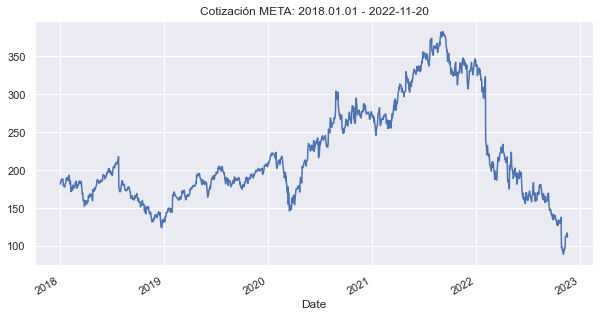

In [309]:
# Show the grafic
plot_title = "Cotización " + stock_name +": " + start_date + " - " + end_date    #Define the plot parameterd
df['Adj Close'].plot(title=plot_title,figsize=(10,5));                           #Show the graphic

In [310]:
# Now we create a New column "previous_close" with the price of day before
df['previous_close'] = df['Adj Close'].shift(1)
display(df)

,High,Low,Open,Close,Volume,Adj Close,previous_close
Date,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006
...,...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002


In [311]:
# Now we create a New column with percent betweeen today and the day before
df['GAP'] =  df['Open'] - df['previous_close']
display(df)

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP
Date,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991
...,...,...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002


In [312]:
# Now we create a New column with Absolute value of the GAP percentage
df['percent_GAP'] = abs(df['GAP']*100 / df['Open'])
display(df)

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP
Date,,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007,0.252918
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996,0.124389
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995,0.678913
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991,0.186961
...,...,...,...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277


In [313]:
# Now we create a New column with Tendency: 1=uptrend OR 0=downtrend
df['up_down_GAP'] = [0 if x < 0 else 1 for x in df['GAP']]
display(df)

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP
Date,,,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN,NaN,1
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007,0.252918,1
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996,0.124389,1
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995,0.678913,1
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991,0.186961,1
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993,0
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864,1
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277,0


In [314]:
# Now we create a New column if the GAP it's closed or not at the same day.
# Values :  1=GAP closed // 0=GAP NOT closed

df['GAP_closed'] = df.apply(lambda x: 1 if 
                            ((x["up_down_GAP"]==1) and (x["Low"] < x["previous_close"])) or 
                            ((x["up_down_GAP"]==0) and (x["High"] > x["previous_close"])) else 
                            0, axis=1)
display(df)        

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed
Date,,,,,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN,NaN,NaN,1,0
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007,0.252918,1,1
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996,0.124389,1,1
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995,0.678913,1,0
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991,0.186961,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993,0,1
2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864,1,0
2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277,0,0


In [315]:
# Organize the dataframe by Percent GAP in order ascending
df_by_GAP = df.sort_values('percent_GAP',ascending=False)
df_by_GAP.head(100)

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed
Date,,,,,,,,,,,
2022-10-27,102.500000,96.379997,97.980003,97.940002,232316600,97.940002,129.820007,-31.840004,32.496431,0,0
2022-02-03,248.000000,235.750000,244.649994,237.759995,188119900,237.759995,323.000000,-78.350006,32.025346,0,0
2018-07-26,180.130005,173.750000,174.889999,176.259995,169803700,176.259995,217.500000,-42.610001,24.363886,0,0
2022-04-28,208.529999,192.899994,202.919998,205.729996,100890600,205.729996,174.949997,27.970001,13.783758,1,0
2020-03-16,159.130005,143.100006,152.320007,146.009995,39120400,146.009995,170.279999,-17.959991,11.790960,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,137.839996,131.399994,137.089996,132.800003,25445000,132.800003,134.039993,3.050003,2.224818,1,1
2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005,195.470001,-4.229996,2.211878,0,0
2020-09-03,297.600006,283.630005,295.989990,291.119995,32294100,291.119995,302.500000,-6.510010,2.199402,0,0


In [316]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed
count,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03,1231.000000,1230.000000,1230.000000,1230.000000,1231.000000,1231.000000
mean,223.194143,217.173363,220.146759,220.199610,2.400866e+07,220.199610,220.287537,-0.106252,1.001963,0.528838,0.645004
std,66.432824,65.262732,65.862558,65.872018,1.692623e+07,65.872018,65.826505,4.122359,1.864694,0.499371,0.478707
min,90.459999,88.089996,90.080002,88.910004,6.046300e+06,88.910004,88.910004,-78.350006,0.000000,0.000000,0.000000
25%,175.525002,170.849998,173.474998,173.360001,1.480745e+07,173.360001,173.412495,-1.137501,0.265341,0.000000,0.000000
50%,198.759995,193.259995,195.389999,196.229996,1.973210e+07,196.229996,196.229996,0.120010,0.589239,1.000000,1.000000
75%,271.554993,264.789993,268.714996,267.620010,2.792530e+07,267.620010,267.645012,1.267494,1.163743,1.000000,1.000000
max,384.329987,378.809998,381.679993,382.179993,2.323166e+08,382.179993,382.179993,27.970001,32.496431,1.000000,1.000000


A continuació guardem les dades del dataset per treballar-les offline (així no necessitem tenir connexió a la base de dades).

In [317]:
# Save our dataframe in a *.csv file. 
# This give us the oportinuty to work in offline in the future if we don't have connectivity with yahoo
df.to_csv('Data sets\\PF\\gaps_META_2018_2022.csv')

A continuació mostrarem un document que ens explica el dataset que tenim i la descripció de tots els camps.

In [318]:
# Import libraries
import os
# Open Word file that explain the Project
r = os.system("dataset_gaps_info.docx")

<span style=color:green><b>2.- EXPLORACIÓ DE DADES I PLANIFICACIÓ DEL MODEL</u></b></span> 

A continuació mostrarem unes visualitzacions gràfiques de les dades per tal de facilitar la comprensió del conjunt de dades que estem analitzant i ajudar-nos a treure conclusions.

Utilitzarem fórmules matemàtiques i tècniques de pre-processat. I analitzarem els valors que tenim al dataframe que hem exportat i complementat.

Aprofitarem l'anàlisis tècnic que fem amb la funció que hem creat "financial_Analytics" per afegir nous camps en el nostre dataset i obtenir més dades per poder tenir un millor Model predictiu.


In [319]:
# Show the information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-01-02 to 2022-11-18
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            1231 non-null   float64
 1   Low             1231 non-null   float64
 2   Open            1231 non-null   float64
 3   Close           1231 non-null   float64
 4   Volume          1231 non-null   int64  
 5   Adj Close       1231 non-null   float64
 6   previous_close  1230 non-null   float64
 7   GAP             1230 non-null   float64
 8   percent_GAP     1230 non-null   float64
 9   up_down_GAP     1231 non-null   int64  
 10  GAP_closed      1231 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 115.4 KB


In [320]:
# Show tha graphic with all values from dataset with the following values:
#       - open and close values (using japanese candlesticks)
#       - volume
#       - SMA (10,20):Simple Moving Average of 10 and 20 periods
#       - RSI: Relative Strength Index  

qf = financial_Analytic(df, 
                        plot_title, 
                        stock_name=stock_name, 
                        start_date = start_date , 
                        sma=True, 
                        rsi=True, 
                        volum=True,
                        bollinger_bands=False,
                        macd=False)

Amb les dades extretes del Gràfic anterior (SMA50, SMA200 i RSI) hem creat una nova versió del dataset que importarem a continuació (Amb l'ajuda de "Export to plot.ly").

L'objectiu d'ampliar el dataset en nous camps és poder tenir un millor Model predictiu.


In [321]:
path_name = "Data sets\\PF\\"                                         # Define Path name
#file_name = "gaps_META_sma_rsi_2018_2022.csv"                        # Define File name
file_name = "gaps_META_2018_2022_New.csv"                             # Define File name
separator = ','                                                       # Define type of char between columns  
movie_column_l = [ 'Date', 'High', 'Low', 'Open' ,'Close','Volume', 'Adj Close',
                   'previous_close', 'GAP', 'percent_GAP',
                   'up_down_GAP', 'GAP_closed', 'sma50', 'sma200', 'rsi']                  # Define name of columns

df2 = openFileTable(path_name, file_name, separator, movie_column_l)   # Function to open File

    
df2  = df2.fillna(0)        #remplace the "NAN" values by "0"
#df2 = df2.drop(1)        #Drop the first row

print ("Dataset amb els nous valors afegits: sma50, sma200 i rsi: ")                                  # Print Message
display(df2)                                                            # Display datset imported



print ("Llegenda:")
print ("    EL datset conté les dades diàries de cotizació de l'empresa META (2018-2022).")
print ("    ")
print ("    0. Date:                           Data en que s'han aguardat tots el següents valors.")
print ("    1. High:                           Preu més Alta de la acció durant la sessió.")
print ("    2. Low:                            Preu més Baix de la acció durant la sessió.")
print ("    3. Open:                           Preu d'Obertura de la sessió.")
print ("    4. Close:                          Preu de tancament de la acció.")
print ("    5. Volume:                         Volum de negociació de l'acció (compra/venta).")
print ("    6. Adj Close:                      Preu ajustat després del tancament de la sessió.")
print ("    7. previous_close:                 Preu de tancament de la acció del dia anterior.")
print ("    8. GAP:                            Diferència entre preu d'Obertura i tancament del dia anterior.")       
print ("    9. percent_GAP:                    Valor de GAP en %.")
print ("   10. up_down_GAP:                    Identificador de GAP Alcista(=1) o Baixista(=0).")
print ("   11. GAP_closed:                     Indica si el GAP s'ha tancat (=1) o no (=0).")
print ("   12. sma50:                          Mitja Mòvil dels últims 50 períodes.")
print ("   13. sma200:                         Mitja Mòvil dels últims 200 períodes.")
print ("   14. rsi:                            Índex de força Relativa del preu de l'acció.")


Dataset amb els nous valors afegits: sma50, sma200 i rsi: 


,Date,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed,sma50,sma200,rsi
0,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,0.000000,0.000000,0.000000,1,0,0.000000,0.00000,0.000000
1,2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007,0.252918,1,1,0.000000,0.00000,0.000000
2,2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996,0.124389,1,1,0.000000,0.00000,0.000000
3,2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995,0.678913,1,0,0.000000,0.00000,0.000000
4,2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991,0.186961,1,1,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993,0,1,130.178199,177.19935,39.455200
1227,2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864,1,0,129.348999,176.21845,41.778237
1228,2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277,0,0,128.405800,175.18960,39.901029
1229,2022-11-17,112.330002,109.800003,110.410004,111.449997,35093800,111.449997,113.230003,-2.820000,2.554116,0,0,127.393600,174.13185,39.868814


Llegenda:
    EL datset conté les dades diàries de cotizació de l'empresa META (2018-2022).
    
    0. Date:                           Data en que s'han aguardat tots el següents valors.
    1. High:                           Preu més Alta de la acció durant la sessió.
    2. Low:                            Preu més Baix de la acció durant la sessió.
    3. Open:                           Preu d'Obertura de la sessió.
    4. Close:                          Preu de tancament de la acció.
    5. Volume:                         Volum de negociació de l'acció (compra/venta).
    6. Adj Close:                      Preu ajustat després del tancament de la sessió.
    7. previous_close:                 Preu de tancament de la acció del dia anterior.
    8. GAP:                            Diferència entre preu d'Obertura i tancament del dia anterior.
    9. percent_GAP:                    Valor de GAP en %.
   10. up_down_GAP:                    Identificador de GAP Alcista(=1) o Baixista(=0)

A continuació afegirem una nova columna que ens indicarà si la SMA50 (mitja mòvil de 50 períodes) és inferior o superior a las SMA200 (mitja mòvil de 200 perídoes). Aquest indicador en serveix per saber si la tendència del valor a llarg plaç és alcista o baixista. Que en el nostre cas ens ajuda a determinar si el GAP es pot tancar o no depenen de la tendència a llarg plaç serà més o menys probable.


In [322]:
# Now we create a New column if the SMA50 > SMA200.
# Values :  1=YES () // 0=NO

df2['SMA50_SMA200'] = df2.apply(lambda x: 1 if 
                            (x["sma50"] > x["sma200"]) else 
                            0, axis=1)
display(df2)        


# Check the percentage of GAP Closed (intraday): 1=Closed or 0=opened 
result11 = (df2['SMA50_SMA200'].value_counts())  / len(df2) * 100

display("Tendència Alcista a llarg  Si=1 or No=0: ",result11)

print(len(df2))

,Date,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed,sma50,sma200,rsi,SMA50_SMA200
0,2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,0.000000,0.000000,0.000000,1,0,0.000000,0.00000,0.000000,0
1,2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,181.419998,0.460007,0.252918,1,1,0.000000,0.00000,0.000000,0
2,2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,184.669998,0.229996,0.124389,1,1,0.000000,0.00000,0.000000,0
3,2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,184.330002,1.259995,0.678913,1,0,0.000000,0.00000,0.000000,0
4,2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,186.850006,0.349991,0.186961,1,1,0.000000,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993,0,1,130.178199,177.19935,39.455200,0
1227,2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864,1,0,129.348999,176.21845,41.778237,0
1228,2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277,0,0,128.405800,175.18960,39.901029,0
1229,2022-11-17,112.330002,109.800003,110.410004,111.449997,35093800,111.449997,113.230003,-2.820000,2.554116,0,0,127.393600,174.13185,39.868814,0


'Tendència Alcista a llarg  Si=1 or No=0: '

1    63.606824
0    36.393176
Name: SMA50_SMA200, dtype: float64

1231


A continuació mostrarem un document que ens explica com ens queadria finalment el dataset que hem modificat i ampliat amb nous camps, ens aquest document tenim també la descripció de tots els camps.

In [323]:
# Import libraries
import os
# Open Word file that explain the Project
r = os.system("dataset_gaps_info_new.docx")

In [324]:
# Check the percentage of GAP Closed (intraday): 1=Closed or 0=opened 
result1 = (df2['GAP_closed'].value_counts())  / len(df2) * 100
# Check the percentage of GAP UP and DOWN: 1=GAP Up or 0=GAP Down 
result2 = (df2['up_down_GAP'].value_counts()) / len(df2) * 100


display("S'ha tancat el GAP  (intradia) Si=1 or No=0: ",result1)
display("Tipus de GAP  Alcista=1 or Baixista=0: ",result2)
print(len(df2))

"S'ha tancat el GAP  (intradia) Si=1 or No=0: "

1    64.500406
0    35.499594
Name: GAP_closed, dtype: float64

'Tipus de GAP  Alcista=1 or Baixista=0: '

1    52.883834
0    47.116166
Name: up_down_GAP, dtype: float64

1231


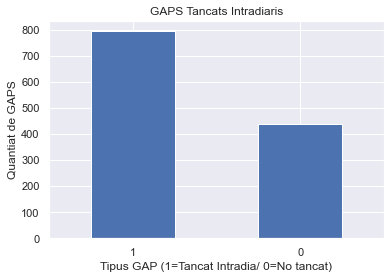

In [325]:
count_classes = pd.value_counts(df2['GAP_closed'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
# Show a grafic
plt.title("GAPS Tancats Intradiaris")
plt.xlabel("Tipus GAP (1=Tancat Intradia/ 0=No tancat)")
plt.ylabel("Quantiat de GAPS");

En les lines anteriors podem observar que el camp del que volem fer la predicció està força compençat : 64,6% SI i 35,39% de NO.
Per tant, tot i que hi ha un resultat que predomina un mica més, considerem necessari fer un submostreig (reduir la classe majoritària) o sobremostreig (aumentar la classe minoritària).

En el nostre cas hem decidit fer un sobremostreig utilitzant SMOTE, per compençar les dades de forma que tinguem un 50% de casos on el GAP s'ha tancat i l'altre 50% de GAPS que no s'han tancat.

Més endavant aplicarem la compensació de les dades.

<AxesSubplot:xlabel='percent_GAP', ylabel='Close'>

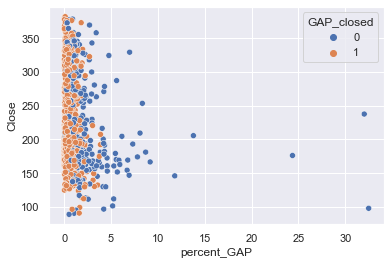

In [326]:
#Show a plot with values gender, distance and duration
df_scplot = df2[['percent_GAP', 'Close', 'GAP_closed']]
sns.scatterplot(data = df_scplot, x ='percent_GAP', y = 'Close', hue = 'GAP_closed')


En la observació i anàlisis de les dades que estem realizant podem observar que en el gràfic la majoria de GAPS que es tanquen intradia són GAPS entre 0% i 2,5%. I de forma molt clara veiem que els GAPS superiors al 2,5% difícilment es tanquen el mateix dia.

A continuació farem una matriu de correlació per determinar quina correlació tenen els diferents valors entre sí, això també ens ajuda a decidir quines dades seran més útils per aplicar al nostre model predictiu.


---------------------------------------------------------------------------------
Matriu de correlació amb el mètode "Seaborn.heatmap" :
---------------------------------------------------------------------------------


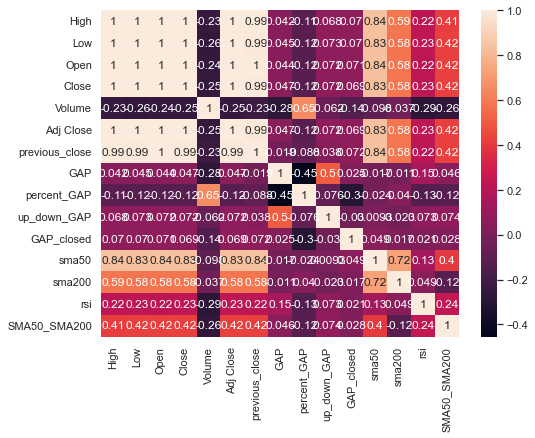

,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed,sma50,sma200,rsi,SMA50_SMA200
High,1.000000,0.998948,0.999188,0.999106,-0.234322,0.999106,0.994379,0.041869,-0.112742,0.068417,0.070404,0.838070,0.587444,0.222711,0.411560
Low,0.998948,1.000000,0.999109,0.999189,-0.257205,0.999189,0.994051,0.045178,-0.123885,0.073284,0.070030,0.832554,0.575866,0.232582,0.420694
Open,0.999188,0.999109,1.000000,0.998144,-0.244901,0.998144,0.995107,0.043803,-0.117783,0.071706,0.071014,0.835553,0.581499,0.223731,0.416954
Close,0.999106,0.999189,0.998144,1.000000,-0.246806,1.000000,0.992955,0.046706,-0.118951,0.071742,0.068555,0.834371,0.580222,0.231619,0.416579
Volume,-0.234322,-0.257205,-0.244901,-0.246806,1.000000,-0.246806,-0.225698,-0.281866,0.651676,-0.062318,-0.143116,-0.098459,-0.036616,-0.287171,-0.261257
Adj Close,0.999106,0.999189,0.998144,1.000000,-0.246806,1.000000,0.992955,0.046706,-0.118951,0.071742,0.068555,0.834371,0.580222,0.231619,0.416579
previous_close,0.994379,0.994051,0.995107,0.992955,-0.225698,0.992955,1.000000,-0.018752,-0.087863,0.038072,0.072168,0.839796,0.584360,0.221130,0.415493
GAP,0.041869,0.045178,0.043803,0.046706,-0.281866,0.046706,-0.018752,1.000000,-0.454364,0.502323,0.024665,-0.016932,-0.011250,0.147244,0.045864
percent_GAP,-0.112742,-0.123885,-0.117783,-0.118951,0.651676,-0.118951,-0.087863,-0.454364,1.000000,-0.075780,-0.304828,-0.024307,0.039636,-0.131744,-0.122845
up_down_GAP,0.068417,0.073284,0.071706,0.071742,-0.062318,0.071742,0.038072,0.502323,-0.075780,1.000000,-0.030261,0.009268,-0.023454,0.073137,0.074142


In [327]:
#generate a correlation dataframe with method "Dataframe.corr()"
corr_matrix = corr_matrix_graphic(df2)
display(corr_matrix)

In [328]:
# Call Function for select what value has more correlation with column "GAP_closed" 
tidy_corr_matrix(corr_matrix).head(60)

,var_1,var_2,r,abs_r
78,Adj Close,Close,1.000000,1.000000
50,Close,Adj Close,1.000000,1.000000
76,Adj Close,Low,0.999189,0.999189
46,Close,Low,0.999189,0.999189
20,Low,Adj Close,0.999189,0.999189
18,Low,Close,0.999189,0.999189
2,High,Open,0.999188,0.999188
30,Open,High,0.999188,0.999188
17,Low,Open,0.999109,0.999109
31,Open,Low,0.999109,0.999109


A continuació eliminarem els 200 primers valors del nostre dataset, ja que al utilitzar el camp SM200, que és la mitja aritmètica dels últims 200 valors, ens provoca que el 199 primers tinguin un valor 0, aper evitar que aquest valors "0" ens afectin a la nostre predicció els eliminarem.

In [329]:
# Clean the first 200 values, because de SMA200 (200 periods) start at row 200.
for x in range(0, 199):
   df2 = df2.drop([df2.index[0]])

display(df2)

,Date,High,Low,Open,Close,Volume,Adj Close,previous_close,GAP,percent_GAP,up_down_GAP,GAP_closed,sma50,sma200,rsi,SMA50_SMA200
199,2018-10-16,159.460007,155.009995,155.399994,158.779999,19180100,158.779999,153.520004,1.879990,1.209775,1,0,167.605999,179.04410,48.433630,0
200,2018-10-17,160.490005,157.949997,159.559998,159.419998,17592000,159.419998,158.779999,0.779999,0.488844,1,1,167.118199,178.93410,46.077585,0
201,2018-10-18,158.660004,153.279999,158.509995,154.919998,21675100,154.919998,159.419998,-0.910004,0.574099,0,0,166.513000,178.78535,38.423016,0
202,2018-10-19,157.350006,153.550003,155.860001,154.050003,19761300,154.050003,154.919998,0.940002,0.603107,1,1,165.932200,178.63395,40.288716,0
203,2018-10-22,157.339996,154.460007,154.759995,154.779999,15424700,154.779999,154.050003,0.709991,0.458769,1,0,165.422600,178.47360,37.912191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2022-11-14,116.269997,110.800003,110.989998,114.220001,53395000,114.220001,113.019997,-2.029999,1.828993,0,1,130.178199,177.19935,39.455200,0
1227,2022-11-15,118.739998,114.410004,116.070000,117.080002,50670500,117.080002,114.220001,1.849998,1.593864,1,0,129.348999,176.21845,41.778237,0
1228,2022-11-16,116.080002,112.660004,114.500000,113.230003,33287800,113.230003,117.080002,-2.580002,2.253277,0,0,128.405800,175.18960,39.901029,0
1229,2022-11-17,112.330002,109.800003,110.410004,111.449997,35093800,111.449997,113.230003,-2.820000,2.554116,0,0,127.393600,174.13185,39.868814,0


El que farem ara serà definir el nostre objectiu, és a dir, quina variable serà la que volem predir ("TARGET"). I quines variables utilitzarem pel nostre model predictiu ("DATA").

In [340]:
# Define our Target/Objective
target = pd.DataFrame(df2['GAP_closed'],columns = ['GAP_closed'])
# Get all parameters from our dataset that we want use to predict
display(target)
#Xcols = [ 'High', 'Low', 'Open' ,'Volume', 'Adj Close',
#                   'previous_close', 'GAP', 'percent_GAP',
#                   'up_down_GAP', 'sma50', 'sma200', 'rsi', 'SMA50_SMA200']     
Xcols = [ 'percent_GAP','Volume','GAP','Adj Close','up_down_GAP', 'sma50', 'sma200', 'rsi', 'SMA50_SMA200'] 
data = df2[Xcols] 
display(data)

,GAP_closed
199,0
200,1
201,0
202,1
203,0
...,...
1226,1
1227,0
1228,0
1229,0


,percent_GAP,Volume,GAP,Adj Close,up_down_GAP,sma50,sma200,rsi,SMA50_SMA200
199,1.209775,19180100,1.879990,158.779999,1,167.605999,179.04410,48.433630,0
200,0.488844,17592000,0.779999,159.419998,1,167.118199,178.93410,46.077585,0
201,0.574099,21675100,-0.910004,154.919998,0,166.513000,178.78535,38.423016,0
202,0.603107,19761300,0.940002,154.050003,1,165.932200,178.63395,40.288716,0
203,0.458769,15424700,0.709991,154.779999,1,165.422600,178.47360,37.912191,0
...,...,...,...,...,...,...,...,...,...
1226,1.828993,53395000,-2.029999,114.220001,0,130.178199,177.19935,39.455200,0
1227,1.593864,50670500,1.849998,117.080002,1,129.348999,176.21845,41.778237,0
1228,2.253277,33287800,-2.580002,113.230003,0,128.405800,175.18960,39.901029,0
1229,2.554116,35093800,-2.820000,111.449997,0,127.393600,174.13185,39.868814,0


Ampliquem la compensació de dades amb la tècnica SMOTE, així obtenim un 50% de casos positius (GAP closed) i 50% de casos negatius (GAP NOT closed).

In [341]:

#Function for doing an  Over Sampling (using SMOTE)
dataSmote, targetSmote = overSampling(data,target)

#Representación
data=dataSmote
target=targetSmote
display(data)
display(target)

,percent_GAP,Volume,GAP,Adj Close,up_down_GAP,sma50,sma200,rsi,SMA50_SMA200
0,1.209775,19180100,1.879990,158.779999,1,167.605999,179.044100,48.433630,0
1,0.488844,17592000,0.779999,159.419998,1,167.118199,178.934100,46.077585,0
2,0.574099,21675100,-0.910004,154.919998,0,166.513000,178.785350,38.423016,0
3,0.603107,19761300,0.940002,154.050003,1,165.932200,178.633950,40.288716,0
4,0.458769,15424700,0.709991,154.779999,1,165.422600,178.473600,37.912191,0
...,...,...,...,...,...,...,...,...,...
1317,0.577883,11911107,-1.149213,257.199344,0,262.023010,245.354094,49.067318,0
1318,5.636472,42545407,-7.699048,172.166667,0,178.428833,241.994088,56.577752,0
1319,0.686280,15451339,-0.716987,181.485315,0,183.916852,169.861842,51.550216,0
1320,1.514769,44670541,1.524336,153.568249,0,147.817908,174.844527,66.478285,0


,GAP_closed
0,0
1,1
2,0
3,1
4,0
...,...
1317,0
1318,0
1319,0
1320,0


In [342]:
# Check the percentage of GAP Closed (intraday): 1=Closed or 0=opened 
result1 = (target['GAP_closed'].value_counts())  / len(df) * 100


display("S'ha tancat el GAP  (intradia) Si=1 or No=0: ",result1)

print(len(dataSmote))

"S'ha tancat el GAP  (intradia) Si=1 or No=0: "

0    53.696182
1    53.696182
Name: GAP_closed, dtype: float64

1322


<span style=color:green><b>3.- DESENVOLUPAMENT DEL MODEL</u></b></span> 

En el següent apartat seleccionarem les variables que volem fer servir pel nostre Model, creearem el model i el dividirem en dos dataset un per entrenament i l'altre per testejar el nostre Model ( "TRAIN" (70%) i "TEST" (30%)), els evaluarem i optimitzarem.

Farem un testeig amb diferents models de Machine Learning per poder escollir quin d'ells és més idoni pel nostre estudi, i quin ens pot donar una millor predicció.

Per poder treure les conculsions i tenir algunes Mètriques d'Evaluació farem una Matriu de confiança per cada un d'ells i calcularem la precisió de cada un d'ells a l'hora de fer la predicció.


Resultat de la Matriu de correlació (MODEL REGRESIÓN LINEAL): 


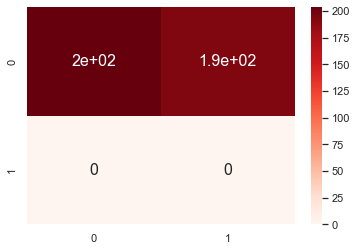

In [343]:
#************************************************************************************
#**********************        Model: LINEAL REGRESION        ***********************
#************************************************************************************
print('Resultat de la Matriu de correlació (MODEL REGRESIÓN LINEAL): ')
model1, dataTrain1, dataTest1, targetTrain1, targetTest1, targetPred1 = model_MLR_Regresion(data,target)


Resultat de la Matriu de correlació (MODEL ARBRE DE DECISIÓ): 


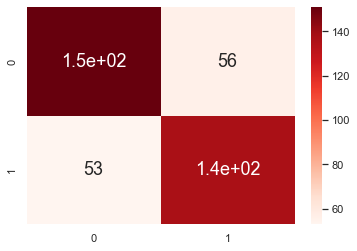

In [344]:
#************************************************************************************
#**********************          Model: DECISION TREE         ***********************
#************************************************************************************
print('Resultat de la Matriu de correlació (MODEL ARBRE DE DECISIÓ): ')
model2, dataTrain2, dataTest2, targetTrain2, targetTest2, targetPred2 = model_MLR_DecisionTree(data,target)



Resultat de la Matriu de correlació (MODEL BOSC ALEATORI): 


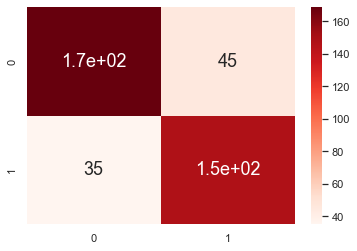

In [345]:
#************************************************************************************
#**********************          Model: RANDOM FOREST         ***********************
#************************************************************************************
print('Resultat de la Matriu de correlació (MODEL BOSC ALEATORI): ')
model3, dataTrain3, dataTest3, targetTrain3, targetTest3, targetPred3 = model_MLR_RandomForest(data,target)


Resultat de la Matriu de correlació (MODEL RED NEURONAL): 


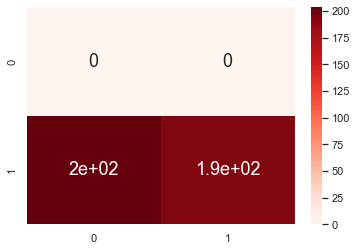

In [346]:
#************************************************************************************
#**********************         Model: NEURONAL NETWORK       ***********************
#************************************************************************************
print('Resultat de la Matriu de correlació (MODEL RED NEURONAL): ')
model4, dataTrain4, dataTest4, targetTrain4, targetTest4, targetPred4 = model_MLR_NeuronalNetwork(data,target)


In [347]:
#Import libraries to calculate the accurancy of our Machine Learning Models
from sklearn.metrics import accuracy_score

# Calculate and Print the results
print('Exactitud Regresió Logística: ' , accuracy_score(targetPred1,targetTest1))
print('Exactitud Arbre de Decisió: '   , accuracy_score(targetPred2,targetTest2))
print('Exactitud Bosc Aleatori: '      , accuracy_score(targetPred3,targetTest3))
print('Exactitud Red Neuronal: '       , accuracy_score(targetPred4,targetTest4))

Exactitud Regresió Logística:  0.5138539042821159
Exactitud Arbre de Decisió:  0.72544080604534
Exactitud Bosc Aleatori:  0.7984886649874056
Exactitud Red Neuronal:  0.48614609571788414


In [348]:
from sklearn import metrics                          # Import scikit-learn metrics module for accuracy calculation

# Calculate and Print the results
print("****************************************************************************")
print("Accuracy Regresió Logística:",metrics.accuracy_score(targetTest1, targetPred1))
print("****************************************************************************")
print("")
print("****************************************************************************")
print("Accuracy Arbre de Decisió :",metrics.accuracy_score(targetTest2, targetPred2))
print("****************************************************************************")
print("")
print("****************************************************************************")
print("Accuracy Bosc Aleatori :",metrics.accuracy_score(targetTest3, targetPred3))
print("****************************************************************************")
print("")
print("****************************************************************************")
print("Accuracy Red Neuronal :",metrics.accuracy_score(targetTest4, targetPred4))
print("****************************************************************************")


****************************************************************************
Accuracy Regresió Logística: 0.5138539042821159
****************************************************************************

****************************************************************************
Accuracy Arbre de Decisió : 0.72544080604534
****************************************************************************

****************************************************************************
Accuracy Bosc Aleatori : 0.7984886649874056
****************************************************************************

****************************************************************************
Accuracy Red Neuronal : 0.48614609571788414
****************************************************************************


Després de fer un testeig amb diferents models de Machine Learning podem observar que el que ens dóna millor resultat és EL BOSC ALEATORI, que ens dóna una Precisió d'un 79%.

Per poder treure les conculsions i tenir algunes Mètriques d'Evaluació farem una Matriu de confiança per cada un d'ells i calcularem la precisió de cada un d'ells a l'hora de fer la predicció.


In [349]:
# Now we want to apply an enginyeering process to improve the Result
# (MinMaxScaler, RobustScaler, StandardScaler, Normalizer...)

#Import libraries
from sklearn import preprocessing

#(1) MinMax Scale: diference between Max and Min.
data_scaler1   = preprocessing.MinMaxScaler()
target_scaler1 = preprocessing.MinMaxScaler()

data_Sclaled1   = data_scaler1.fit_transform(data)
target_Sclaled1 = target_scaler1.fit_transform(target)

# Create a dataframe with function Mix and Max Sclaer
dataFinal1   = pd.DataFrame(data_Sclaled1, columns   = data.columns)
targetFinal1 = pd.DataFrame(target_Sclaled1, columns = target.columns)
display(dataFinal1)
display(targetFinal1)

,percent_GAP,Volume,GAP,Adj Close,up_down_GAP,sma50,sma200,rsi,SMA50_SMA200
0,0.037228,0.058045,0.754609,0.238245,1.0,0.174122,0.101258,0.446840,0.0
1,0.015043,0.051026,0.744263,0.240427,1.0,0.172068,0.100636,0.412805,0.0
2,0.017667,0.069071,0.728367,0.225083,0.0,0.169520,0.099793,0.302229,0.0
3,0.018559,0.060613,0.745768,0.222116,1.0,0.167074,0.098936,0.329180,0.0
4,0.014118,0.041448,0.743604,0.224605,1.0,0.164929,0.098028,0.294849,0.0
...,...,...,...,...,...,...,...,...,...
1317,0.017783,0.025919,0.726117,0.573838,0.0,0.571662,0.476718,0.455994,0.0
1318,0.173449,0.161308,0.664512,0.283891,0.0,0.219691,0.457693,0.564489,0.0
1319,0.021119,0.041566,0.730183,0.315666,0.0,0.242798,0.049267,0.491862,0.0
1320,0.046613,0.170700,0.751264,0.220473,0.0,0.090804,0.077480,0.707510,0.0


,GAP_closed
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1317,0.0
1318,0.0
1319,0.0
1320,0.0


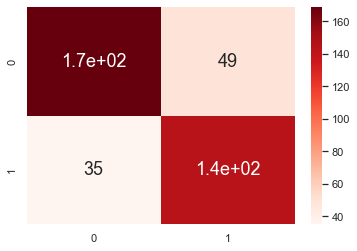

In [350]:
# Check the Model Random  Forest with "MinMaxScaler" values
model10, dataTrain10, dataTest10, targetTrain10, targetTest10, targetPred10 = model_MLR_RandomForest(dataFinal1,targetFinal1)


Hem provat de millorar els resultats, però el procés que respòn millor és el "MixManScaler", tot i així, el resultat segueix sent inferior al que hem obtingut amb una precisió del 78% respecte al 79% que ja teníem.


In [352]:
print("****************************************************************************")
print("Accuracy Bosc Aleatori :",metrics.accuracy_score(targetTest10, targetPred10))
print("****************************************************************************")

****************************************************************************
Accuracy Bosc Aleatori : 0.7884130982367759
****************************************************************************


In [353]:
#Print percentatge prediction from each value
print('Probabilitats en la Predicció de Resultats: ')
print(model3.predict_proba(dataTest3))

display(dataTest3)

Probabilitats en la Predicció de Resultats: 
[[0.75 0.25]
 [0.   1.  ]
 [0.8  0.2 ]
 [0.62 0.38]
 [0.8  0.2 ]
 [0.05 0.95]
 [0.66 0.34]
 [0.06 0.94]
 [0.96 0.04]
 [0.78 0.22]
 [0.73 0.27]
 [0.04 0.96]
 [0.66 0.34]
 [0.54 0.46]
 [0.05 0.95]
 [0.63 0.37]
 [0.5  0.5 ]
 [0.42 0.58]
 [0.72 0.28]
 [0.97 0.03]
 [0.88 0.12]
 [0.77 0.23]
 [0.89 0.11]
 [0.25 0.75]
 [0.73 0.27]
 [0.96 0.04]
 [0.45 0.55]
 [0.62 0.38]
 [0.43 0.57]
 [0.85 0.15]
 [0.42 0.58]
 [0.15 0.85]
 [0.63 0.37]
 [0.94 0.06]
 [0.92 0.08]
 [0.96 0.04]
 [0.04 0.96]
 [0.06 0.94]
 [0.91 0.09]
 [0.13 0.87]
 [0.84 0.16]
 [0.85 0.15]
 [0.04 0.96]
 [0.14 0.86]
 [0.89 0.11]
 [0.43 0.57]
 [0.81 0.19]
 [0.06 0.94]
 [0.3  0.7 ]
 [0.09 0.91]
 [0.08 0.92]
 [0.78 0.22]
 [0.89 0.11]
 [0.69 0.31]
 [0.86 0.14]
 [0.29 0.71]
 [0.78 0.22]
 [0.94 0.06]
 [0.32 0.68]
 [0.05 0.95]
 [0.46 0.54]
 [0.84 0.16]
 [0.2  0.8 ]
 [0.74 0.26]
 [0.83 0.17]
 [0.77 0.23]
 [0.41 0.59]
 [0.83 0.17]
 [0.39 0.61]
 [0.61 0.39]
 [0.72 0.28]
 [0.93 0.07]
 [0.41 0.59]
 [0.03

,percent_GAP,Volume,GAP,Adj Close,up_down_GAP,sma50,sma200,rsi,SMA50_SMA200
1292,0.754102,14544230,2.437170,329.007296,1,315.652192,315.012022,65.094071,0
406,0.115457,23241500,-0.260010,225.089996,0,189.381601,193.357400,66.688499,0
1061,1.198683,24998499,-0.984904,223.420929,0,232.855436,213.553175,36.604708,1
202,0.495636,15833200,-0.909988,185.149994,0,189.848000,167.310199,31.096766,1
1190,0.717568,14456972,1.543029,217.818849,1,200.366698,187.755358,75.033284,1
...,...,...,...,...,...,...,...,...,...
1283,1.812847,28003666,1.713955,199.459281,0,215.317712,227.375976,38.218430,0
989,0.204934,38338600,0.300003,142.119995,1,164.764200,216.061951,37.408831,0
817,0.513464,14797100,1.720001,326.480011,1,333.467001,337.474501,42.456762,0
1321,0.615894,15389918,-1.579921,239.982799,0,214.166613,202.030988,65.140353,1


In [354]:
#Import libraries
from sklearn.model_selection import GridSearchCV

#Define parameters to hiperparametrize
param_grid = [{'criterion': ['gini','entropy'],          #['gini','entropy'], 
              'max_depth': [None, 50, 100, 200, 500],    #[None, 50, 100, 200, 500],
              'min_samples_split': [2,3,4]}]             #[2,3,4]}]  

#Start search with Grid using cross validation (using cross Validation)
grid = GridSearchCV(model3, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Train the Model
grid.fit(dataTrain3,targetTrain3)

#Print Result
print("Millors paràmetres: ")
print(grid.best_params_)
print()
print("Puntuacions obtingudes: ")
print(grid.cv_results_['mean_test_score'])

Millors paràmetres: 
{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 4}

Puntuacions obtingudes: 
[0.77941493 0.78500594 0.78048231 0.78341073 0.7822699  0.79816313
 0.78349963 0.78900374 0.78958356 0.79739641 0.78572729 0.77953614
 0.78657431 0.78983312 0.78881045 0.79538564 0.78069063 0.78572006
 0.77829028 0.78585654 0.78493476 0.79004319 0.78567336 0.78474492
 0.78857178 0.78876616 0.78685824 0.78190896 0.78234428 0.78498696]


In [355]:
#Set predcitions with best result obtained with function "GridSearch"
targetPredGrid = grid.predict(dataTest3)

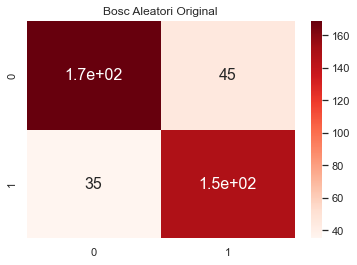

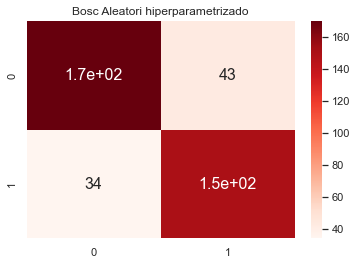

In [356]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
    
#Obtención de la matriz
arrayDTS = confusion_matrix(targetPred3, targetTest3)
arrayGrid = confusion_matrix(targetPredGrid, targetTest3)
df_cmDTS = pd.DataFrame(arrayDTS)
df_cmGrid = pd.DataFrame(arrayGrid)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.title('Bosc Aleatori Original')
plt.show(sn.heatmap(df_cmDTS, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 
plt.title('Bosc Aleatori hiperparametrizado')
plt.show(sn.heatmap(df_cmGrid, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

In [357]:
print("****************************************************************************")
print("Accuracy Bosc Aleatori Original:",metrics.accuracy_score(targetTest3, targetPred3))
print("****************************************************************************")
print("")
print("****************************************************************************")
print("Accuracy Bosc Aleatori Hiperparametritzat:",metrics.accuracy_score(targetTest3, targetPredGrid))
print("****************************************************************************")

****************************************************************************
Accuracy Bosc Aleatori Original: 0.7984886649874056
****************************************************************************

****************************************************************************
Accuracy Bosc Aleatori Hiperparametritzat: 0.8060453400503779
****************************************************************************


In [358]:
#Get the target values
targetTest3_New = targetTest3.reset_index(drop=True)
print(targetTest3_New)

#Get the prediction values
targetPred3_New = pd.DataFrame(targetPred3)
targetPred3_New = targetPred3_New.drop([df2.index[0]])
targetPred3_New=targetPred3_New.set_axis(['pred'], axis=1)

#print(targetPred3)
print(targetPred3_New)

     GAP_closed
0             0
1             1
2             0
3             1
4             0
..          ...
392           0
393           1
394           1
395           0
396           0

[397 rows x 1 columns]
     pred
0       0
1       1
2       0
3       0
4       0
..    ...
392     0
393     1
394     1
395     0
396     0

[396 rows x 1 columns]


In [359]:
performance =pd.DataFrame({'PREDICCIONS':targetPred3_New['pred'],'ACTUALS':targetTest3_New['GAP_closed']})
performance['error'] =performance['ACTUALS'] - performance['PREDICCIONS'] 
display(performance.head(100))
display(performance.value_counts())


,PREDICCIONS,ACTUALS,error
0,0.0,0,0.0
1,1.0,1,0.0
2,0.0,0,0.0
3,0.0,1,1.0
4,0.0,0,0.0
...,...,...,...
95,1.0,1,0.0
96,1.0,1,0.0
97,1.0,1,0.0
98,0.0,1,1.0


PREDICCIONS  ACTUALS  error
0.0          0         0.0     169
1.0          1         0.0     148
0.0          1         1.0      45
1.0          0        -1.0      34
dtype: int64

<span style=color:green><b>4.- Resultats Finals</u></b></span> 

Inicialment partiem d'un conjunt de dades Històriques, i per tant, el nostre plantajament és el de crear un Model d'APRENENTAGE SUPERVISAT. La nostra hipòtesis inicial era que el millor model pel nostre cas podria ser l'ARBRE DE DECISIÓ o el BOSC ALEATORI, ja que el nostre objectiu no és predir quins valors futurs tindrien les accions (on probablement el millor seria un model de Regresió), sinó predir un resultat discret: SI o NO.

Després de veure els resultats obtinguts en les proves anteriors podem considerar que la millor opció predictiva per les nostre dades seria el MODEL DE BOSC ALEATORI amb una precisió d'un 79,59%

In [360]:
# Import libraries
import joblib  

joblib.dump(model3, 'model_Train_GAPS.pkl') # Save the model

['model_Train_GAPS.pkl']